# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCResp") or did not press a button ("SCRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2, 2 is run 3, and 3 is run 4.

`CongruentCounter` marks any time a congruent trial occurred; `IncongruentCounter` an incongruent trial.

`StimPresented` refers to which scene was presented before the trial. This is in reference to the main manipulation of the S-C association phase, whereby particular scenes are more likely to precede specific proportions of congruent/incongruent trials.

`StimProbAll` refers to my matrix of possible trial types. So it indicates whether "RED" will be shown in red, etc.

`TrialType` also marks incongruent/congruent trials.

`StroopNum` refers to the Stroop Stimuli: 1 is BLUE in BLUE; 2 RED in RED; 3 GREEN in GREEN; 4 YELLOW in YELLOW; 6 BLUE in YELLOW; 10 RED in GREEN; 12 YELLOW in BLUE; 14 GREEN in RED. This is in reference to a key manipulation of this experiment, whereby the scenes are now associated with particular percentages of Stroop Stimuli. Two are unbiased (blue/yellow) such that they will appear in congruent and incongruent colors half of the time, while two are biased (red/green) such that they will always appear as congruent or incongruent, depending on the particular S2 image presented.

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when scene was presented.

`StimTime` refers to when the color word was presented.

`ColorTime` refers to when the color of the color word was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `Sequential` refers to whether a trial was the same (0) as before, changed to incongruent or congruent on the next trial, etc., and `StimRep` looks for direct repetitions in the StimProbAll matrix. These were coded in Matlab and added to the CSV file.

---

### Here we'll just import Python specific packages and read in our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [2]:
%cd C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data    
dat = pd.read_csv('AllSubsSC.csv')

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

FOR REACTION TIMES:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 800 ms (b/c 200 ms, the color-word is black).

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


FOR ACCURACY:

-All errors are errors

In [3]:
cdat = dat.query('(TypeOfResponse != "SCRespITI") & (RT > 200) & (RT < 800) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

#### Now I'm making columns in the data based off my variables so that analysis will be easier.

In [4]:
adat['DemandCue'] = adat['StimPresented'].isin([1, 2])
adat.loc[adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
adat.loc[~adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

adat['Congruency'] = adat['TrialType'].isin([1])
adat.loc[adat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
adat.loc[~adat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

adat['FreqBias'] = adat['StroopNumber'].isin([1])
adat.loc[adat['StroopNumber'].isin([2,3,10,14]),'FreqBias'] = 'FreqBiased'
adat.loc[adat['StroopNumber'].isin([1,4,6,12]),'FreqBias'] = 'FreqUnbiased'

cdat['DemandCue'] = cdat['StimPresented'].isin([1, 2])
cdat.loc[cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
cdat.loc[~cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

cdat['Congruency'] = cdat['TrialType'].isin([1])
cdat.loc[cdat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
cdat.loc[~cdat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

cdat['FreqBias'] = cdat['StroopNumber'].isin([1])
cdat.loc[cdat['StroopNumber'].isin([2,3,10,14]),'FreqBias'] = 'FreqBiased'
cdat.loc[cdat['StroopNumber'].isin([1,4,6,12]),'FreqBias'] = 'FreqUnbiased'

In [5]:
adat['ContextCong'] = adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

cdat['ContextCong'] = cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

# Look at Mean Cueing Effects

### We are looking here specifically at our frequency-unbiased stimuli to see whether we find an interaction between control-demand cue and congruency, such that people use the cues to modulate Stroop congruency. Namely, we would predict that people would have a smaller difference between the Stroop trial types for the "high" compared to "low" control-demand cue. This would result from learning to associate a state of higher attentional focus with the high control-demand cue, which in turn means more efficient processing - or responding quicker to incongruent trials and potentially slower to congruent trials.

### If we find reduced congruency effects for the frequency biased stimuli, that would suggest that people are learning cue-response or cue-stimulus-response contingencies.

In [116]:
sub_RTmeans = cdat.loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

ContextCong
HighC     478.677654
HighIC    557.532881
LowC      474.930654
LowIC     567.216231
Name: RT, dtype: float64

In [117]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

ContextCong
HighC     36.448175
HighIC    34.503738
LowC      35.144979
LowIC     31.226809
Name: RT, dtype: float64

In [118]:
n = math.sqrt(44)
RTstderror = RTgrpstd / n
RTstderror

ContextCong
HighC     5.494769
HighIC    5.201634
LowC      5.298305
LowIC     4.707619
Name: RT, dtype: float64

#### Looking good for the frequency unbiased stimuli - what of the frequency biased stimuli? Do they generally have a smaller congruency difference?

In [119]:
sub_RTmeans_Bias = cdat.loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean_Bias = pd.Series.mean(sub_RTmeans_Bias,level=1)
RTgrpmean_Bias

ContextCong
HighIC    582.213313
LowC      519.377019
Name: RT, dtype: float64

In [120]:
RTgrpstd_Bias = pd.Series.std(sub_RTmeans_Bias,level=1)
n = math.sqrt(44)
RTstderror_Bias = RTgrpstd_Bias / n

#### Indeed, the congruency for the frequency biased stimuli is smaller than either that following the high or low demand cue, and the congruency following the high demand cue (557 - 478) is smaller than that following the low demand cue (567 - 474). We will test the significance of these differences later.

#### Now, what of Accuracy?

In [146]:
sub_ACCmeans = adat.loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

ContextCong
HighC     0.959494
HighIC    0.926640
LowC      0.947025
LowIC     0.934361
Name: Accuracy, dtype: float64

In [147]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

ContextCong
HighC     0.048398
HighIC    0.043890
LowC      0.059570
LowIC     0.059879
Name: Accuracy, dtype: float64

In [148]:
n = math.sqrt(44)
ACCstderror = ACCgrpstd / n
ACCstderror

ContextCong
HighC     0.007296
HighIC    0.006617
LowC      0.008981
LowIC     0.009027
Name: Accuracy, dtype: float64

In [149]:
sub_ACCmeans_Bias = adat.loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean_Bias = pd.Series.mean(sub_ACCmeans_Bias,level=1)
ACCgrpmean_Bias

ContextCong
HighIC    0.863281
LowC      0.888139
Name: Accuracy, dtype: float64

In [150]:
ACCgrpstd_Bias = pd.Series.std(sub_ACCmeans_Bias,level=1)
n = math.sqrt(44)
ACCstderror_Bias = ACCgrpstd_Bias / n

#### Interestingly, we find a different pattern for accuracy: the congruency difference following the low demand cue is smaller than that following the high demand cue, yet the difference for the frequency biased stimuli is not smaller than that following the low demand cue.

#### Let's dig a little deeper now.

# Creating Variables to Run Statistics & Graph Data

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for congruent & incongruent trials, after presentation of the low & high control-demand cue, for each subject.

In [26]:
RTanalysis_Bias = pd.DataFrame()
bias_lists = [[] for list in range(0,7)]
FreqBiasStim = cdat[cdat.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasStim[FreqBiasStim.subject == ID]
    bias_lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    bias_lists[1].append(LowCRT_trials)
    bias_lists[2].append(HighICRT_trials)
    
RTanalysis_Bias['SubjectID'] = bias_lists[0]
RTanalysis_Bias['LowC'] = bias_lists[1]
RTanalysis_Bias['HighIC'] = bias_lists[2]

In [24]:
RTanalysis_unbias = pd.DataFrame()
unbias_lists = [[] for list in range(0,7)]
FreqUnBiasStim = cdat[cdat.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasStim[FreqUnBiasStim.subject == ID]
    unbias_lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    unbias_lists[1].append(LowCRT_trials)
    unbias_lists[2].append(LowICRT_trials)
    unbias_lists[3].append(HighCRT_trials)
    unbias_lists[4].append(HighICRT_trials)
    
RTanalysis_unbias['SubjectID'] = unbias_lists[0]
RTanalysis_unbias['LowC'] = unbias_lists[1]
RTanalysis_unbias['LowIC'] = unbias_lists[2]
RTanalysis_unbias['HighC'] = unbias_lists[3]
RTanalysis_unbias['HighIC'] = unbias_lists[4]

In [41]:
ACCanalysis_Bias = pd.DataFrame()
bias_acclists = [[] for list in range(0,7)]
FreqBiasACCStim = adat[adat.FreqBias =='FreqBiased'];

for ID in range(1,55):
    sub = FreqBiasACCStim[FreqBiasACCStim.subject == ID]
    bias_acclists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    bias_acclists[1].append(LowCACC_trials)
    bias_acclists[2].append(HighICACC_trials)
    
ACCanalysis_Bias['SubjectID'] = bias_acclists[0]
ACCanalysis_Bias['LowC'] = bias_acclists[1]
ACCanalysis_Bias['HighIC'] = bias_acclists[2]

In [42]:
ACCanalysis_unbias = pd.DataFrame()
unbias_acclists = [[] for list in range(0,7)]
FreqUnBiasACCStim = adat[adat.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasACCStim[FreqUnBiasACCStim.subject == ID]
    unbias_acclists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    unbias_acclists[1].append(LowCACC_trials)
    unbias_acclists[2].append(LowICACC_trials)
    unbias_acclists[3].append(HighCACC_trials)
    unbias_acclists[4].append(HighICACC_trials)
    
ACCanalysis_unbias['SubjectID'] = unbias_acclists[0]
ACCanalysis_unbias['LowC'] = unbias_acclists[1]
ACCanalysis_unbias['LowIC'] = unbias_acclists[2]
ACCanalysis_unbias['HighC'] = unbias_acclists[3]
ACCanalysis_unbias['HighIC'] = unbias_acclists[4]

##### now for run as well

In [43]:
RTrunanalysis_Bias = pd.DataFrame()
bias_lists = [[] for list in range(0,7)]
FreqBiasStim = cdat[cdat.FreqBias =='FreqBiased']

for ID in range(1,55):
    sub = FreqBiasStim[FreqBiasStim.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        bias_lists[0].append(ID)
        bias_lists[1].append(runID)
        LowCRT_trials = run[run.ContextCong == 'LowC'].RT.mean()
        HighICRT_trials = run[run.ContextCong == 'HighIC'].RT.mean()
        bias_lists[2].append(LowCRT_trials)
        bias_lists[3].append(HighICRT_trials)
    
RTrunanalysis_Bias['SubjectID'] = bias_lists[0]
RTrunanalysis_Bias['Run'] = bias_lists[1]
RTrunanalysis_Bias['LowC'] = bias_lists[2]
RTrunanalysis_Bias['HighIC'] = bias_lists[3]

In [44]:
RTrunanalysis_unbias = pd.DataFrame()
new_RTlists = [[] for list in range(0,8)]
FreqUnBiasStim = cdat[cdat.FreqBias =='FreqUnbiased']

for ID in range(1,55):
    sub = FreqUnBiasStim[FreqUnBiasStim.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        LowCRT_trials = run[run.ContextCong == 'LowC'].RT.mean()
        LowICRT_trials = run[run.ContextCong == 'LowIC'].RT.mean()
        HighCRT_trials = run[run.ContextCong == 'HighC'].RT.mean()
        HighICRT_trials = run[run.ContextCong == 'HighIC'].RT.mean()    
        new_RTlists[2].append(LowCRT_trials)
        new_RTlists[3].append(LowICRT_trials)
        new_RTlists[4].append(HighCRT_trials)
        new_RTlists[5].append(HighICRT_trials)
    
RTrunanalysis_unbias['SubjectID'] = new_RTlists[0]
RTrunanalysis_unbias['Run'] = new_RTlists[1]
RTrunanalysis_unbias['LowC'] = new_RTlists[2]
RTrunanalysis_unbias['LowIC'] = new_RTlists[3]
RTrunanalysis_unbias['HighC'] = new_RTlists[4]
RTrunanalysis_unbias['HighIC'] = new_RTlists[5]

In [55]:
ACCrunanalysis_Bias = pd.DataFrame()
bias_lists = [[] for list in range(0,7)]
FreqBiasStim = adat[adat.FreqBias =='FreqBiased']

for ID in range(1,55):
    sub = FreqBiasStim[FreqBiasStim.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        bias_lists[0].append(ID)
        bias_lists[1].append(runID)
        LowCRT_trials = run[run.ContextCong == 'LowC'].Accuracy.mean()
        HighICRT_trials = run[run.ContextCong == 'HighIC'].Accuracy.mean()
        bias_lists[2].append(LowCRT_trials)
        bias_lists[3].append(HighICRT_trials)
    
ACCrunanalysis_Bias['SubjectID'] = bias_lists[0]
ACCrunanalysis_Bias['Run'] = bias_lists[1]
ACCrunanalysis_Bias['LowC'] = bias_lists[2]
ACCrunanalysis_Bias['HighIC'] = bias_lists[3]

In [56]:
ACCrunanalysis_unbias = pd.DataFrame()
new_acclists = [[] for list in range(0,8)]
FreqUnBiasStim = adat[adat.FreqBias =='FreqUnbiased'];

for ID in range(1,55):
    sub = FreqUnBiasStim[FreqUnBiasStim.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        LowCACC_trials = run[run.ContextCong == 'LowC'].Accuracy.mean()
        LowICACC_trials = run[run.ContextCong == 'LowIC'].Accuracy.mean()
        HighCACC_trials = run[run.ContextCong == 'HighC'].Accuracy.mean()
        HighICACC_trials = run[run.ContextCong == 'HighIC'].Accuracy.mean()    
        new_acclists[2].append(LowCACC_trials)
        new_acclists[3].append(LowICACC_trials)
        new_acclists[4].append(HighCACC_trials)
        new_acclists[5].append(HighICACC_trials)
    
ACCrunanalysis_unbias['SubjectID'] = new_acclists[0]
ACCrunanalysis_unbias['Run'] = new_acclists[1]
ACCrunanalysis_unbias['LowC'] = new_acclists[2]
ACCrunanalysis_unbias['LowIC'] = new_acclists[3]
ACCrunanalysis_unbias['HighC'] = new_acclists[4]
ACCrunanalysis_unbias['HighIC'] = new_acclists[5]

In [57]:
#filtering out the empty subject cells (subjects excluded or whose data is missing)

RTanalysis_Bias = RTanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
RTanalysis_unbias = RTanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
ACCanalysis_Bias = ACCanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
ACCanalysis_unbias = ACCanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
RTrunanalysis_Bias = RTrunanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
RTrunanalysis_unbias = RTrunanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
ACCrunanalysis_Bias = ACCrunanalysis_Bias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()
ACCrunanalysis_unbias = ACCrunanalysis_unbias.query('(SubjectID != 50) & (SubjectID != 44) & (SubjectID != 32) & (SubjectID != 31) & (SubjectID != 3) & (SubjectID != 16) & (SubjectID != 17) & (SubjectID != 20) & (SubjectID != 27) & (SubjectID != 30)').copy()

# Run Actual Statistics

#### For the S-C phase, we run a repeated-measures ANOVA comparing RTs and accuracies for control-demand cue (low/high) & congruency (congruent/incongruent) & run (4), especially for frequency-unbiased stimuli. For frequency-biased stimuli, we can look at the congruency differences for them vs. for the unbiased stimuli following each cue.

Unfortunately, Python does not have the capability for repeated-measures ANOVA ("pyvtttbl" is not as good as other programs), so I will include R code to run the ANOVA. I will also include a "sneak peak" below via paired t-tests.

In [63]:
#sneak peak at the interaction for frequency unbiased stimuli
LowCongUnbias = RTanalysis_unbias.LowIC - RTanalysis_unbias.LowC;
HighCongUnbias = RTanalysis_unbias.HighIC - RTanalysis_unbias.HighC;
stats.ttest_rel(LowCongDiff, HighCongDiff)

Ttest_relResult(statistic=3.6141156895978792, pvalue=0.00078471136088461917)

In [64]:
LowCongUnbiasACC = ACCanalysis_unbias.LowIC - ACCanalysis_unbias.LowC;
HighCongUnbiasACC = ACCanalysis_unbias.HighIC - ACCanalysis_unbias.HighC;
stats.ttest_rel(LowCongDiffACC, HighCongDiffACC)

Ttest_relResult(statistic=1.8974968411448798, pvalue=0.06449009040222746)

In [65]:
BiasRT = RTanalysis_Bias.HighIC - RTanalysis_Bias.LowC
BiasACC = ACCanalysis_Bias.HighIC - ACCanalysis_Bias.LowC

In [66]:
#testing whether frequency-biased congruency < congruency following high demand cue for frequency-unbiased stim
stats.ttest_rel(BiasRT, HighCongUnbias)

Ttest_relResult(statistic=-3.378538302058772, pvalue=0.0015579281354313652)

In [67]:
#testing whether frequency-biased congruency < congruency following low demand cue for frequency-unbiased stim
stats.ttest_rel(BiasRT, LowCongUnbias)

Ttest_relResult(statistic=-6.030752504338647, pvalue=3.2985927750121564e-07)

In [68]:
#testing whether frequency-biased congruency < congruency following high demand cue for frequency-unbiased stim
stats.ttest_rel(BiasACC, HighCongUnbiasACC)

Ttest_relResult(statistic=0.69890366526545611, pvalue=0.48837545719681985)

In [69]:
#testing whether frequency-biased congruency < congruency following low demand cue for frequency-unbiased stim
stats.ttest_rel(BiasACC, LowCongUnbiasACC)

Ttest_relResult(statistic=-1.1242936260258272, pvalue=0.2671257302734506)

Here: I'm storing the congruency differences from the control-demand cues to compare them with S-CT effects.

In [109]:
SCRTcueing = LowCongUnbias - HighCongUnbias;
SCRTcueing = SCRTcueing.reset_index()
SCRTcueing.columns = ['index', 'RT']

SCRTcueing_Bias = BiasRT;
SCRTcueing_Bias = SCRTcueing_Bias.reset_index()
SCRTcueing_Bias.columns = ['index', 'RT']

SCACCcueing = LowCongUnbiasACC - HighCongUnbiasACC;
SCACCcueing = SCACCcueing.reset_index()
SCACCcueing.columns = ['index', 'RT']

SCACCcueing_Bias = BiasACC;
SCACCcueing_Bias = SCACCcueing_Bias.reset_index()
SCACCcueing_Bias.columns = ['index', 'RT']

In [110]:
overallSCRT = cdat.groupby(['subject'])['RT'].mean().reset_index()
overallSCRT = overallSCRT.drop('subject',1);
overallSCACC = adat.groupby(['subject'])['Accuracy'].mean().reset_index()
overallSCACC = overallSCACC.drop('subject',1);

%store overallSCRT
%store overallSCACC
%store SCRTcueing
%store SCRTcueing_Bias
%store SCACCcueing
%store SCACCcueing_Bias

Stored 'overallSCRT' (DataFrame)
Stored 'overallSCACC' (DataFrame)
Stored 'SCRTcueing' (DataFrame)
Stored 'SCRTcueing_Bias' (DataFrame)
Stored 'SCACCcueing' (DataFrame)
Stored 'SCACCcueing_Bias' (DataFrame)


In [111]:
#checking for a RT/Accuracy trade-off
stats.linregress(overallSCRT.RT,overallSCACC.Accuracy)

LinregressResult(slope=-0.00015528756155728032, intercept=0.99155930248565205, rvalue=-0.086009903799347726, pvalue=0.5788049856610834, stderr=0.00027755637135565807)

## Running ANOVAs in R

First, I need to make the data CSVs that the R script will analyze. Then I will write the necessary R script and run it in another cell here. You'll be able to see the inputs below & I summarize the results there as well. The cont files refer to contingency learning, another section in the manuscript

In [112]:
%cd csvdata

C:\Users\cb383\Desktop\YearTwo\controlwork\SCP_R\data\csvdata


In [113]:
AN_sub_RTmeans_UnBias = cdat.loc[cdat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','RunCounter','DemandCue','TrialType'])['RT'].mean();
AN_sub_RTmeans_Bias = cdat.loc[cdat['FreqBias'] == 'FreqBiased'].groupby(['subject','RunCounter','ContextCong'])['RT'].mean();
AN_sub_RTmeans_Freq = cdat.groupby(['subject','RunCounter','TrialType','FreqBias'])['RT'].mean();
AN_sub_ACCmeans_UnBias = adat.loc[adat['FreqBias'] == 'FreqUnbiased'].groupby(['subject','RunCounter','DemandCue','TrialType'])['Accuracy'].mean();
AN_sub_ACCmeans_Bias = adat.loc[adat['FreqBias'] == 'FreqBiased'].groupby(['subject','RunCounter','ContextCong'])['Accuracy'].mean();
AN_sub_ACCmeans_Freq = adat.groupby(['subject','RunCounter','TrialType','FreqBias'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans_UnBias.to_csv('SC_ANOVA_RT_UnBias.csv')
AN_sub_RTmeans_Bias.to_csv('SC_ANOVA_RT_Bias.csv')
AN_sub_ACCmeans_UnBias.to_csv('SC_ANOVA_ACC_UnBias.csv')
AN_sub_ACCmeans_Bias.to_csv('SC_ANOVA_ACC_Bias.csv')
AN_sub_RTmeans_Freq.to_csv('SC_ANOVA_RT_Freq.csv')
AN_sub_ACCmeans_Freq.to_csv('SC_ANOVA_ACC_Freq.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv

with open('SC_ANOVA_RT_Bias.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT_Bias.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "contextcong", "rt"])
    w.writerows(data)    

with open('SC_ANOVA_RT_UnBias.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT_UnBias.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "demandcue", "trialtype", "rt"])
    w.writerows(data)

with open('SC_ANOVA_ACC_Bias.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC_Bias.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "contextcong", "rt"])
    w.writerows(data) 
    
with open('SC_ANOVA_ACC_UnBias.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC_UnBias.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "demandcue", "trialtype", "acc"])
    w.writerows(data)
    
with open('SC_ANOVA_RT_Freq.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT_Freq.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "trialtype", "freqbias", "rt"])
    w.writerows(data)

with open('SC_ANOVA_ACC_Freq.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC_Freq.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "trialtype", "freqbias", "acc"])
    w.writerows(data)

In [114]:
%%writefile SCAnova.R

rawRTData_UnBias <- read.csv('SC_ANOVA_RT_UnBias.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData_UnBias$subject = as.factor(rawRTData_UnBias$subject)
rawRTData_UnBias$run = as.factor(rawRTData_UnBias$run)
rawRTData_UnBias$demandcue = as.factor(rawRTData_UnBias$demandcue)
rawRTData_UnBias$trialtype = as.factor(rawRTData_UnBias$trialtype)

SC_RT_runANOVA_unbias <- ezANOVA(data=as.data.frame(rawRTData_UnBias),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, demandcue, trialtype),
                                  detailed=TRUE)
print(SC_RT_runANOVA_unbias)

#

rawRTData_Freq <- read.csv('SC_ANOVA_RT_Freq.csv')

rawRTData_Freq$subject = as.factor(rawRTData_Freq$subject)
rawRTData_Freq$run = as.factor(rawRTData_Freq$run)
rawRTData_Freq$trialtype = as.factor(rawRTData_Freq$trialtype)
rawRTData_Freq$freqbias = as.factor(rawRTData_Freq$freqbias)

SC_RT_runANOVA_freq <- ezANOVA(data=as.data.frame(rawRTData_Freq),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, trialtype, freqbias),
                                  detailed=TRUE)
print(SC_RT_runANOVA_freq)

#

rawACCData_UnBias <- read.csv('SC_ANOVA_ACC_UnBias.csv')

rawACCData_UnBias$subject = as.factor(rawACCData_UnBias$subject)
rawACCData_UnBias$run = as.factor(rawACCData_UnBias$run)
rawACCData_UnBias$demandcue = as.factor(rawACCData_UnBias$demandcue)
rawACCData_UnBias$trialtype = as.factor(rawACCData_UnBias$trialtype)

SC_ACC_runANOVA_unbias <- ezANOVA(data=as.data.frame(rawACCData_UnBias),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, demandcue, trialtype),
                                  detailed=TRUE)
print(SC_ACC_runANOVA_unbias)

#

rawACCData_Freq <- read.csv('SC_ANOVA_ACC_Freq.csv')

rawACCData_Freq$subject = as.factor(rawACCData_Freq$subject)
rawACCData_Freq$run = as.factor(rawACCData_Freq$run)
rawACCData_Freq$trialtype = as.factor(rawACCData_Freq$trialtype)
rawACCData_Freq$freqbias = as.factor(rawACCData_Freq$freqbias)

SC_ACC_runANOVA_freq <- ezANOVA(data=as.data.frame(rawACCData_Freq),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, trialtype, freqbias),
                                  detailed=TRUE)
print(SC_ACC_runANOVA_freq)


Overwriting SCAnova.R


In [115]:
! Rscript SCAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpSgnDW1\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpSgnDW1\downloaded_packages
$ANOVA
                   Effect DFn DFd          SSn       SSd            F
1             (Intercept)   1  43 1.901655e+08 597724.74 1.368041e+04
2                     run   3 129 4.244042e+04 238421.87 7.654239e+00
3               demandcue   1  43 1.402412e+03  38511.61 1.565858e+00
4               trialtype   1  43 1.289617e+06 153546.95 3.611504e+02
5           run:demandcue   3 129 5.337859e+02  98922.85 2.320272e-01
6           run:trialtype   3 129 4.711909e+03 108254.93 1.871620e+00
7     demandcue:trialtype   1  43 7.445320e+03  30353.60 1.054731e+01
8 run:demandcue:trialtype   3 129 2.195152e+03 119195.79 7.919031e-01
             p p<.05          ges
1 1.

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/psych_1.7.8.zip'
Content type 'application/zip' length 5341358 bytes (5.1 MB)
downloaded 5.1 MB

Installing package into 'C:/Users/cb383/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.4/ez_4.4-0.zip'
Content type 'application/zip' length 332184 bytes (324 KB)
downloaded 324 KB



In Experiment 3, we amplified the trial-by-trial conflict by increasing the time between the presentation of a Stroop color-word and its printed color. This strengthened S-C learning by increasing the predictive utility of the S2 images, now seen in a significant cue * demand interaction for the frequency unbiased stimuli, suggesting that our previous results did not arise from simple, S-R contingency learning.

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [127]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


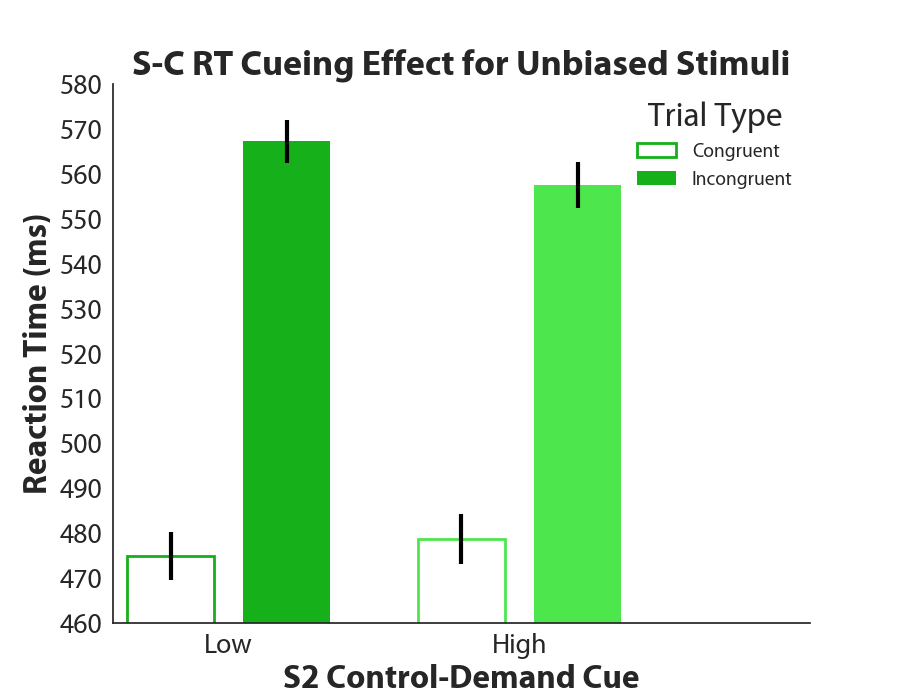

In [131]:
#barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis_unbias.LowC.mean(),barwidth,yerr=RTstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,RTanalysis_unbias.HighC.mean(),barwidth,yerr=RTstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,RTanalysis_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(460,580);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(460, 581, 10));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=14)
plt.title('S-C RT Cueing Effect for Unbiased Stimuli', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


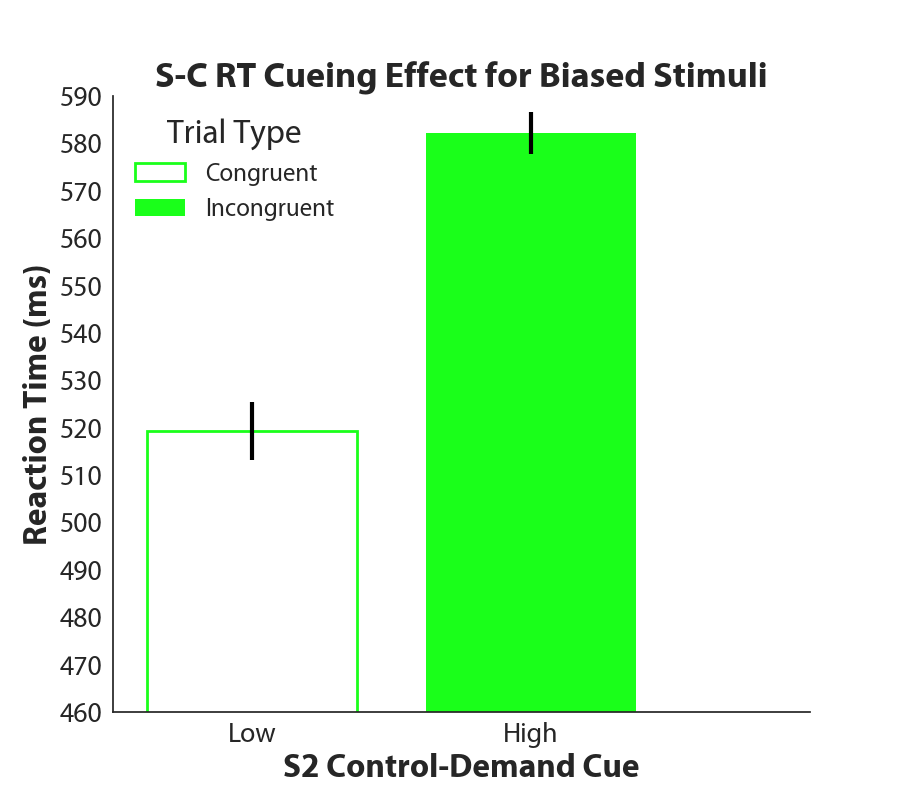

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [142]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 8));
rects3 = ax.bar(0.5,RTanalysis_Bias.LowC.mean(),barwidth,yerr=RTstderror_Bias.LowC,ecolor='k',edgecolor=(0.1,1,0.1),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(1.5,RTanalysis_Bias.HighIC.mean(),barwidth,color=(0.1,1,0.1),yerr=RTstderror_Bias.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(460,590);
ax.set_xlim(0,2.5);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([0.5, 1.5]);
ax.set_yticks(np.arange(460, 591, 10));
plt.legend([rects3,rects4], ['Congruent','Incongruent'], loc='upper left',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=14)
plt.title('S-C RT Cueing Effect for Biased Stimuli', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


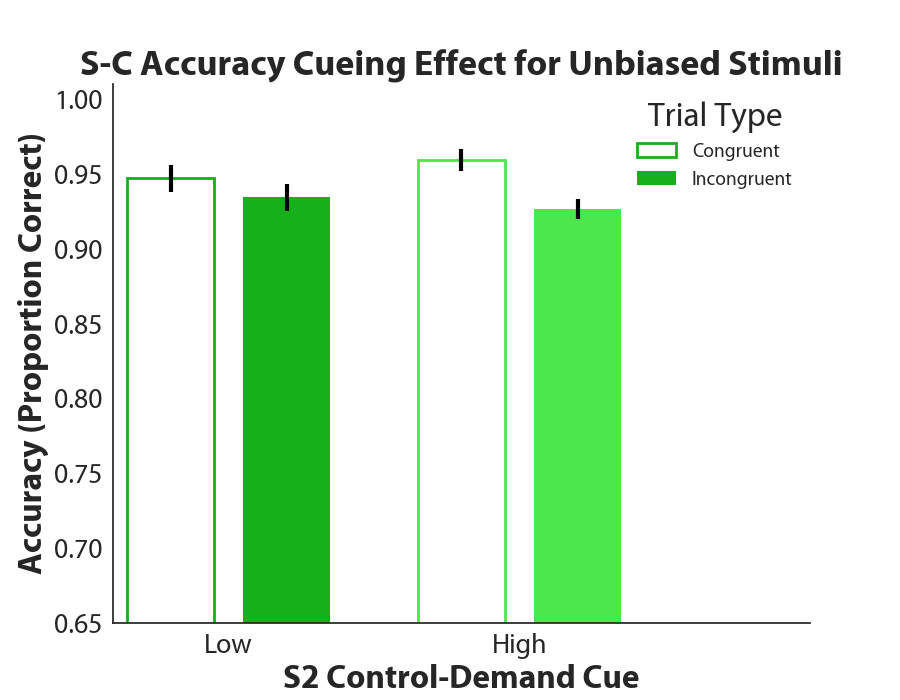

In [151]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis_unbias.LowC.mean(),barwidth,yerr=ACCstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis_unbias.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,ACCanalysis_unbias.HighC.mean(),barwidth,yerr=ACCstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,ACCanalysis_unbias.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1, 3.5]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=14)
plt.title('S-C Accuracy Cueing Effect for Unbiased Stimuli', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


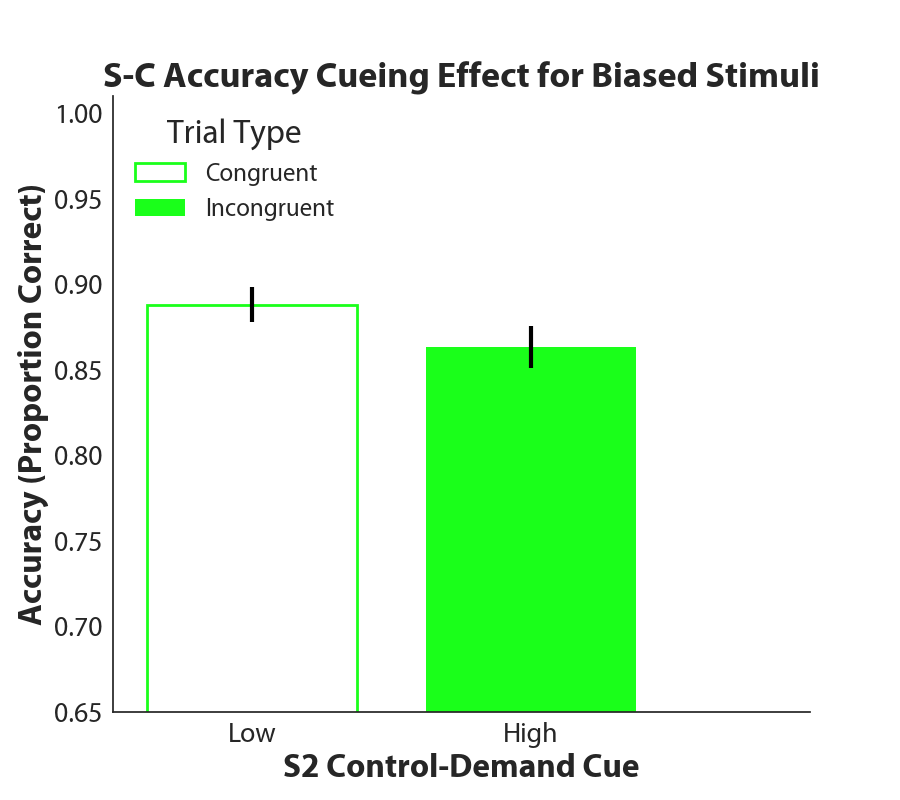

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [154]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 8));
rects1 = ax.bar(0.5,ACCanalysis_Bias.LowC.mean(),barwidth,yerr=ACCstderror_Bias.LowC,ecolor='k',edgecolor=(0.1,1,0.1),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects2 = ax.bar(1.5,ACCanalysis_Bias.HighIC.mean(),barwidth,color=(0.1,1,0.1),yerr=ACCstderror_Bias.HighIC,ecolor='k',error_kw=dict(lw=3));
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,2.5);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([0.5, 1.5]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper left',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=14)
plt.title('S-C Accuracy Cueing Effect for Biased Stimuli', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

# Making 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [216]:
import statsmodels.stats.api as sms

a = RTanalysis_unbias.LowC.mean()
sms.DescrStatsW(RTanalysis_unbias.LowC).tconfint_mean()
a

474.9306543625287

In [217]:
a = RTanalysis_unbias.LowIC.mean()
sms.DescrStatsW(RTanalysis_unbias.LowIC).tconfint_mean()
a

567.216230612733

In [218]:
a = RTanalysis_unbias.HighC.mean()
sms.DescrStatsW(RTanalysis_unbias.HighC).tconfint_mean()
a

478.67765426391674

In [219]:
a = RTanalysis_unbias.HighIC.mean()
sms.DescrStatsW(RTanalysis_unbias.HighIC).tconfint_mean()
a

557.5328810481745

In [220]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].LowC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].LowC).tconfint_mean()
a

487.91001082251097

In [221]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].LowIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].LowIC).tconfint_mean()
a

580.4790043290044

In [222]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].HighC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].HighC).tconfint_mean()
a

492.71295995671005

In [223]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 0].HighIC).tconfint_mean()
a

566.0730790043291

In [224]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].LowC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].LowC).tconfint_mean()
a

469.9515963203464

In [225]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].LowIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].LowIC).tconfint_mean()
a

573.8950757575757

In [226]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].HighC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].HighC).tconfint_mean()
a

476.3230519480518

In [227]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 1].HighIC).tconfint_mean()
a

559.6101731601731

In [228]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].LowC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].LowC).tconfint_mean()
a

476.02053571428564

In [229]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].LowIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].LowIC).tconfint_mean()
a

557.7829274891775

In [230]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].HighC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].HighC).tconfint_mean()
a

477.9008387445887

In [231]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 2].HighIC).tconfint_mean()
a

555.4123647186148

In [232]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].LowC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].LowC).tconfint_mean()
a

466.48373917748927

In [233]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].LowIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].LowIC).tconfint_mean()
a

556.6254058441559

In [234]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].HighC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].HighC).tconfint_mean()
a

468.1540854978355

In [235]:
a = RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_unbias.loc[RTrunanalysis_unbias['Run'] == 3].HighIC).tconfint_mean()
a

550.3792748917748

And for now the frequency-biased stimuli...

In [236]:
a = RTanalysis_Bias.LowC.mean()
sms.DescrStatsW(RTanalysis_Bias.LowC).tconfint_mean()
a

519.3770192313912

In [237]:
a = RTanalysis_Bias.HighIC.mean()
sms.DescrStatsW(RTanalysis_Bias.HighIC).tconfint_mean()
a

582.2133127848814

In [238]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 0].LowC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 0].LowC).tconfint_mean()
a

518.8236941089215

In [239]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 0].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 0].HighIC).tconfint_mean()
a

591.8293394421236

In [240]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 1].LowC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 1].LowC).tconfint_mean()
a

522.051423671026

In [241]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 1].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 1].HighIC).tconfint_mean()
a

591.1219381628471

In [242]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 2].LowC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 2].LowC).tconfint_mean()
a

520.2937976795932

In [243]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 2].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 2].HighIC).tconfint_mean()
a

581.9552299026732

In [244]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 3].LowC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 3].LowC).tconfint_mean()
a

516.6180101148852

In [245]:
a = RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 3].HighIC.mean()
sms.DescrStatsW(RTrunanalysis_Bias.loc[RTrunanalysis_Bias['Run'] == 3].HighIC).tconfint_mean()
a

567.155103419308

And for Accuracy...

In [246]:
a = ACCanalysis_unbias.LowC.mean()
sms.DescrStatsW(ACCanalysis_unbias.LowC).tconfint_mean()
a

0.9470246823069405

In [247]:
a = ACCanalysis_unbias.LowIC.mean()
sms.DescrStatsW(ACCanalysis_unbias.LowIC).tconfint_mean()
a

0.9343612536656891

In [248]:
a = ACCanalysis_unbias.HighC.mean()
sms.DescrStatsW(ACCanalysis_unbias.HighC).tconfint_mean()
a

0.9594941348973607

In [249]:
a = ACCanalysis_unbias.HighIC.mean()
sms.DescrStatsW(ACCanalysis_unbias.HighIC).tconfint_mean()
a

0.9266403958944281

In [250]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].LowC).tconfint_mean()
a

0.9569805194805195

In [251]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].LowIC).tconfint_mean()
a

0.9232954545454546

In [252]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].HighC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].HighC).tconfint_mean()
a

0.9370941558441559

In [253]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 0].HighIC).tconfint_mean()
a

0.8916396103896105

In [254]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].LowC).tconfint_mean()
a

0.9460227272727273

In [255]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].LowIC).tconfint_mean()
a

0.9375

In [256]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].HighC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].HighC).tconfint_mean()
a

0.9715909090909091

In [257]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 1].HighIC).tconfint_mean()
a

0.9403409090909091

In [258]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].LowC).tconfint_mean()
a

0.9375

In [259]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].LowIC).tconfint_mean()
a

0.9399350649350651

In [260]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].HighC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].HighC).tconfint_mean()
a

0.9715909090909091

In [261]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 2].HighIC).tconfint_mean()
a

0.9403409090909091

In [262]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].LowC).tconfint_mean()
a

0.9488636363636364

In [263]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].LowIC).tconfint_mean()
a

0.9375

In [264]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].HighC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].HighC).tconfint_mean()
a

0.9573863636363636

In [265]:
a = ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_unbias.loc[ACCrunanalysis_unbias['Run'] == 3].HighIC).tconfint_mean()
a

0.9346590909090909

And for now the frequency-biased stimuli...

In [266]:
a = ACCanalysis_Bias.LowC.mean()
sms.DescrStatsW(ACCanalysis_Bias.LowC).tconfint_mean()
a

0.8881392045454546

In [267]:
a = ACCanalysis_Bias.HighIC.mean()
sms.DescrStatsW(ACCanalysis_Bias.HighIC).tconfint_mean()
a

0.86328125

In [268]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 0].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 0].LowC).tconfint_mean()
a

0.8678977272727273

In [269]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 0].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 0].HighIC).tconfint_mean()
a

0.8153409090909091

In [270]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 1].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 1].LowC).tconfint_mean()
a

0.8778409090909091

In [271]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 1].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 1].HighIC).tconfint_mean()
a

0.859375

In [272]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 2].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 2].LowC).tconfint_mean()
a

0.9005681818181818

In [273]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 2].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 2].HighIC).tconfint_mean()
a

0.8948863636363636

In [274]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 3].LowC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 3].LowC).tconfint_mean()
a

0.90625

In [275]:
a = ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 3].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis_Bias.loc[ACCrunanalysis_Bias['Run'] == 3].HighIC).tconfint_mean()
a

0.8835227272727273